<a href="https://colab.research.google.com/github/Alesnim/seq2seq_rr/blob/master/preprocessing%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random


num0 = list('111101101101111')
num1 = list('001001001001001')
num2 = list('111001111100111')
num3 = list('111001111001111')
num4 = list('101101111001001')
num5 = list('111100111001111')
num6 = list('111100111101111')
num7 = list('111001001001001')
num8 = list('111101111101111')
num9 = list('111101111001111')



In [0]:
nums = [num0, num1, num2, num3, num4, num5, num6, num7, num8, num9]


In [0]:
# Виды цифры 5 (Тестовая выборка)
num51 = list('111100111000111')
num52 = list('111100010001111')
num53 = list('111100011001111')
num54 = list('110100111001111')
num55 = list('110100111001011')
num56 = list('111100101001111')

In [0]:
weights = [0 for i in range(15)]

In [0]:
bias = 7

In [0]:
def aes_nn(num):
  net = 0 
  for i in range(15):
    net += int(num[i])*weights[i]
  return  net >= bias

In [0]:
def decrease(num):
  for i in range(15):
    if int(num[i]) == 1:
      weights[i] -= 1 

In [0]:
def increase(num):
  for i in range(15):
    if int(num[i]) == 1:
      weights[i] += 1 

In [0]:

for i in range(100000):
  options = random.randint(0,9)
  
  if options != 5: 
    if aes_nn(nums[options]):
      decrease(nums[options])
    else:
      if not aes_nn(num5):
        increase(num5)

In [32]:
print(weights)

[1, 1, 1, 2, 0, -7, 1, 2, 1, -7, 0, 1, 1, 1, 1]


In [34]:
print("0 это 5? ", aes_nn(num0))
print("1 это 5? ", aes_nn(num1))
print("2 это 5? ", aes_nn(num2))
print("3 это 5? ", aes_nn(num3))
print("4 это 5? ", aes_nn(num4))
print("6 это 5? ", aes_nn(num6))
print("7 это 5? ", aes_nn(num7))
print("8 это 5? ", aes_nn(num8))
print("9 это 5? ", aes_nn(num9), '\n')

0 это 5?  False
1 это 5?  False
2 это 5?  False
3 это 5?  False
4 это 5?  False
6 это 5?  False
7 это 5?  False
8 это 5?  False
9 это 5?  False 



In [35]:
print("Узнал 5? ", aes_nn(num5))
print("Узнал 5 - 1? ", aes_nn(num51))
print("Узнал 5 - 2? ", aes_nn(num52))
print("Узнал 5 - 3? ", aes_nn(num53))
print("Узнал 5 - 4? ", aes_nn(num54))
print("Узнал 5 - 5? ", aes_nn(num55))
print("Узнал 5 - 6? ", aes_nn(num56))

Узнал 5?  True
Узнал 5 - 1?  True
Узнал 5 - 2?  True
Узнал 5 - 3?  True
Узнал 5 - 4?  True
Узнал 5 - 5?  True
Узнал 5 - 6?  True


In [0]:
k = random.uniform(-5,5)
c = random.uniform(-5,5)

In [0]:
data = {
    1: 2,
    2: 4.2,
    2.5: 5,
    3.8: 7.9,
    4: 9,
    6: 10.2,
    6.6: 13,
    7.2: 15.3,
    8: 17.1,
    8.5: 19.5
}

In [42]:
rate = 0.0001
def proseed(x):
  return x*k+c

print('Начальная прямая: ', k, '* X + ', c)
for i in range(100000):
    x = random.choice(list(data.keys()))
    true_result = data[x]
    out = proseed(x)
    delta = true_result - out
    k += delta*rate*x
    c += delta*rate
print('Готовая прямая: ', k, '* X + ', c)

Начальная прямая:  2.1712603903306515 * X +  -0.519443802061758
Готовая прямая:  2.1574849621663423 * X +  -0.4116615491563347


In [40]:
print('Начальная прямая: ', k, '* X + ', c)

Начальная прямая:  2.1712603903306515 * X +  -0.519443802061758


In [41]:
print('Готовая прямая: ', k, '* X + ', c)

Готовая прямая:  2.1712603903306515 * X +  -0.519443802061758


In [0]:
import tensorflow as tf

In [0]:
import tensorflow as tf

# Say hello.
hello = tf.constant('Hello, TensorWorld!')
sess = tf.Session()

# --> Hello, TensorWorld!

In [3]:
print sess.run(hello)

SyntaxError: ignored

In [0]:
import nltk 

In [0]:
import numpy as np
import tensorflow as tf


tf.reset_default_graph()
sess = tf.InteractiveSession()

In [3]:
tf.__version__

'1.11.0'

In [0]:
PAD = 0
EOS = 1

vocab_size = 10
input_embedding_size = 20

encoder_hidden_units = 20
decoder_hidden_units = encoder_hidden_units * 2

In [0]:
encoder_inputs = tf.placeholder(shape=(None, None), dtype=tf.int32, name='encoder_inputs')
encoder_inputs_length = tf.placeholder(shape=(None,), dtype=tf.int32, name='encoder_inputs_length')

decoder_targets = tf.placeholder(shape=(None, None), dtype=tf.int32, name='decoder_targets')

In [0]:
embeddings = tf.Variable(tf.random_uniform([vocab_size, input_embedding_size], -1.0, 1.0), dtype=tf.float32)

encoder_inputs_embedded = tf.nn.embedding_lookup(embeddings, encoder_inputs)

In [0]:
from tensorflow.contrib.rnn import LSTMCell, LSTMStateTuple

In [0]:
encoder_cell = LSTMCell(encoder_hidden_units)

In [0]:
((encoder_fw_outputs,
  encoder_bw_outputs),
 (encoder_fw_final_state,
  encoder_bw_final_state)) = (
    tf.nn.bidirectional_dynamic_rnn(cell_fw=encoder_cell,
                                    cell_bw=encoder_cell,
                                    inputs=encoder_inputs_embedded,
                                    sequence_length=encoder_inputs_length,
                                    dtype=tf.float32, time_major=True)
    )

In [10]:
encoder_fw_outputs

<tf.Tensor 'bidirectional_rnn/fw/fw/TensorArrayStack/TensorArrayGatherV3:0' shape=(?, ?, 20) dtype=float32>

In [11]:
encoder_bw_outputs

<tf.Tensor 'ReverseSequence:0' shape=(?, ?, 20) dtype=float32>

In [12]:
encoder_fw_final_state

LSTMStateTuple(c=<tf.Tensor 'bidirectional_rnn/fw/fw/while/Exit_3:0' shape=(?, 20) dtype=float32>, h=<tf.Tensor 'bidirectional_rnn/fw/fw/while/Exit_4:0' shape=(?, 20) dtype=float32>)

In [0]:
encoder_outputs = tf.concat((encoder_fw_outputs, encoder_bw_outputs), 2)

encoder_final_state_c = tf.concat(
    (encoder_fw_final_state.c, encoder_bw_final_state.c), 1)

encoder_final_state_h = tf.concat(
    (encoder_fw_final_state.h, encoder_bw_final_state.h), 1)

encoder_final_state = LSTMStateTuple(
    c=encoder_final_state_c,
    h=encoder_final_state_h
)

In [0]:
decoder_cell = LSTMCell(decoder_hidden_units)

In [0]:
decoder_cell = LSTMCell(decoder_hidden_units)

In [0]:
encoder_max_time, batch_size = tf.unstack(tf.shape(encoder_inputs))

In [0]:
decoder_lengths = encoder_inputs_length + 3

In [0]:
W = tf.Variable(tf.random_uniform([decoder_hidden_units, vocab_size], -1, 1), dtype=tf.float32)
b = tf.Variable(tf.zeros([vocab_size]), dtype=tf.float32)

In [0]:
assert EOS == 1 and PAD == 0

eos_time_slice = tf.ones([batch_size], dtype=tf.int32, name='EOS')
pad_time_slice = tf.zeros([batch_size], dtype=tf.int32, name='PAD')

eos_step_embedded = tf.nn.embedding_lookup(embeddings, eos_time_slice)
pad_step_embedded = tf.nn.embedding_lookup(embeddings, pad_time_slice)

In [0]:
def loop_fn_initial():
    initial_elements_finished = (0 >= decoder_lengths)  # all False at the initial step
    initial_input = eos_step_embedded
    initial_cell_state = encoder_final_state
    initial_cell_output = None
    initial_loop_state = None  # we don't need to pass any additional information
    return (initial_elements_finished,
            initial_input,
            initial_cell_state,
            initial_cell_output,
            initial_loop_state)

In [0]:
def loop_fn_transition(time, previous_output, previous_state, previous_loop_state):

    def get_next_input():
        output_logits = tf.add(tf.matmul(previous_output, W), b)
        prediction = tf.argmax(output_logits, axis=1)
        next_input = tf.nn.embedding_lookup(embeddings, prediction)
        return next_input
    
    elements_finished = (time >= decoder_lengths) # this operation produces boolean tensor of [batch_size]
                                                  # defining if corresponding sequence has ended

    finished = tf.reduce_all(elements_finished) # -> boolean scalar
    input = tf.cond(finished, lambda: pad_step_embedded, get_next_input)
    state = previous_state
    output = previous_output
    loop_state = None

    return (elements_finished, 
            input,
            state,
            output,
            loop_state)

In [0]:
def loop_fn(time, previous_output, previous_state, previous_loop_state):
    if previous_state is None:    # time == 0
        assert previous_output is None and previous_state is None
        return loop_fn_initial()
    else:
        return loop_fn_transition(time, previous_output, previous_state, previous_loop_state)

decoder_outputs_ta, decoder_final_state, _ = tf.nn.raw_rnn(decoder_cell, loop_fn)
decoder_outputs = decoder_outputs_ta.stack()

In [0]:
decoder_max_steps, decoder_batch_size, decoder_dim = tf.unstack(tf.shape(decoder_outputs))
decoder_outputs_flat = tf.reshape(decoder_outputs, (-1, decoder_dim))
decoder_logits_flat = tf.add(tf.matmul(decoder_outputs_flat, W), b)
decoder_logits = tf.reshape(decoder_logits_flat, (decoder_max_steps, decoder_batch_size, vocab_size))

In [0]:
decoder_prediction = tf.argmax(decoder_logits, 2)

In [0]:
stepwise_cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(
    labels=tf.one_hot(decoder_targets, depth=vocab_size, dtype=tf.float32),
    logits=decoder_logits,
)

loss = tf.reduce_mean(stepwise_cross_entropy)
train_op = tf.train.AdamOptimizer().minimize(loss)

In [0]:
sess.run(tf.global_variables_initializer())

In [0]:
def random_sequences(length_from, length_to,
                     vocab_lower, vocab_upper,
                     batch_size):
    """ Generates batches of random integer sequences,
        sequence length in [length_from, length_to],
        vocabulary in [vocab_lower, vocab_upper]
    """
    if length_from > length_to:
            raise ValueError('length_from > length_to')

    def random_length():
        if length_from == length_to:
            return length_from
        return np.random.randint(length_from, length_to + 1)
    
    while True:
        yield [
            np.random.randint(low=vocab_lower,
                              high=vocab_upper,
                              size=random_length()).tolist()
            for _ in range(batch_size)
        ]

In [32]:
batch_size = 100

batches = random_sequences(length_from=3, length_to=8,
                                   vocab_lower=2, vocab_upper=10,
                                   batch_size=batch_size)

print('head of the batch:')
for seq in next(batches)[:10]:
    print(seq)

head of the batch:
[8, 8, 5]
[9, 4, 9, 5, 6, 5, 9, 3]
[4, 2, 9, 4, 3, 8, 7, 9]
[7, 9, 9, 8, 6]
[8, 4, 6, 2, 9]
[9, 6, 6]
[3, 4, 5]
[9, 8, 9, 7, 9, 6, 6]
[7, 6, 4]
[5, 4, 2, 8, 8, 2, 6, 7]


In [0]:
def next_feed():
    batch = next(batches)
    encoder_inputs_, encoder_input_lengths_ = batch_1(batch)
    decoder_targets_, _ = batch_1(
        [(sequence) + [EOS] + [PAD] * 2 for sequence in batch]
    )
    return {
        encoder_inputs: encoder_inputs_,
        encoder_inputs_length: encoder_input_lengths_,
        decoder_targets: decoder_targets_,
    }

In [0]:
loss_track = []

In [0]:
def batch_1(inputs, max_sequence_length=None):
    """
    Args:
        inputs:
            list of sentences (integer lists)
        max_sequence_length:
            integer specifying how large should `max_time` dimension be.
            If None, maximum sequence length would be used
    
    Outputs:
        inputs_time_major:
            input sentences transformed into time-major matrix 
            (shape [max_time, batch_size]) padded with 0s
        sequence_lengths:
            batch-sized list of integers specifying amount of active 
            time steps in each input sequence
    """
    
    sequence_lengths = [len(seq) for seq in inputs]
    batch_size = len(inputs)
    
    if max_sequence_length is None:
        max_sequence_length = max(sequence_lengths)
    
    inputs_batch_major = np.zeros(shape=[batch_size, max_sequence_length], dtype=np.int32) # == PAD
    
    for i, seq in enumerate(inputs):
        for j, element in enumerate(seq):
            inputs_batch_major[i, j] = element

    # [batch_size, max_time] -> [max_time, batch_size]
    inputs_time_major = inputs_batch_major.swapaxes(0, 1)

    return inputs_time_major, sequence_lengths

In [42]:
max_batches = 3001
batches_in_epoch = 1000

try:
    for batch in range(max_batches):
        fd = next_feed()
        _, l = sess.run([train_op, loss], fd)
        loss_track.append(l)

        if batch == 0 or batch % batches_in_epoch == 0:
            print('batch {}'.format(batch))
            print('  minibatch loss: {}'.format(sess.run(loss, fd)))
            predict_ = sess.run(decoder_prediction, fd)
            for i, (inp, pred) in enumerate(zip(fd[encoder_inputs].T, predict_.T)):
                print('  sample {}:'.format(i + 1))
                print('    input     > {}'.format(inp))
                print('    predicted > {}'.format(pred))
                if i >= 2:
                    break
            print()

except KeyboardInterrupt:
    print('training interrupted')

batch 0
  minibatch loss: 2.293344497680664
  sample 1:
    input     > [9 5 3 5 4 0 0 0]
    predicted > [8 4 6 2 2 3 3 3 0 0 0]
  sample 2:
    input     > [6 3 8 2 4 6 8 0]
    predicted > [8 4 2 2 8 1 2 3 3 3 0]
  sample 3:
    input     > [6 2 2 5 8 2 0 0]
    predicted > [5 4 9 3 3 3 3 3 3 0 0]

batch 1000
  minibatch loss: 0.5178948044776917
  sample 1:
    input     > [9 6 8 6 9 6 5 3]
    predicted > [6 9 6 6 6 6 3 3 1 0 0]
  sample 2:
    input     > [6 6 2 8 7 4 0 0]
    predicted > [6 6 8 2 7 4 1 0 0 0 0]
  sample 3:
    input     > [4 6 3 5 3 2 8 0]
    predicted > [4 6 3 3 3 8 8 1 0 0 0]

batch 2000
  minibatch loss: 0.2301717847585678
  sample 1:
    input     > [8 8 8 0 0 0 0 0]
    predicted > [8 8 8 1 0 0 0 0 0 0 0]
  sample 2:
    input     > [7 6 4 2 3 6 0 0]
    predicted > [7 6 4 2 3 6 1 0 0 0 0]
  sample 3:
    input     > [3 4 2 9 8 4 2 0]
    predicted > [3 4 2 9 8 2 2 1 0 0 0]

batch 3000
  minibatch loss: 0.15943557024002075
  sample 1:
    input     > [4 6 7

loss 0.1606 after 300100 examples (batch_size=100)


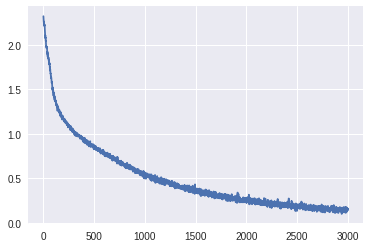

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(loss_track)
print('loss {:.4f} after {} examples (batch_size={})'.format(loss_track[-1], len(loss_track)*batch_size, batch_size))

In [1]:
%% ls -a 

UsageError: Cell magic `%%` not found.


In [2]:
% ls -a

./  ../  .config/  sample_data/


In [3]:
% ls ./sample_data/

anscombe.json*                mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md*


In [4]:
% git clone https://github.com/Koziev/NLP_Datasets.git

UsageError: Line magic function `%git` not found.


In [5]:
% apt-get install git

UsageError: Line magic function `%apt` not found.


In [3]:
! git clone https://github.com/Koziev/NLP_Datasets.git
 

Cloning into 'NLP_Datasets'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 323 (delta 0), reused 3 (delta 0), pack-reused 318
Receiving objects: 100% (323/323), 169.10 MiB | 27.50 MiB/s, done.
Resolving deltas: 100% (141/141), done.
Checking out files: 100% (79/79), done.


In [2]:
% ls -a

./  ../  .config/  NLP_Datasets/  sample_data/


In [8]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation

Using TensorFlow backend.


In [20]:
! ls ./NLP_Datasets -a

.	       .git		    QA	       WordformFrequencies
..	       Lemmas		    README.md  WordSubsets
ChangePerson   MutualInfo	    Samples
Conversations  ParaphraseDetection  Stress


In [25]:
! ls ./NLP_Datasets/Conversations/

Data


In [3]:
! tail ./NLP_Datasets/Conversations/Data/ru.conversations.txt

- Ceкpeт.

- Cмотpитe, завтpа вeтpeный бyдeт дeнь!
- Oткyда вы знаeтe?
- Видитe вокpyг лyны матовоe пятно?

- Вы что, тожe читаeтe этот pоман?
- A как жe... Kаждоe yтpо...
- Чeгo-тo мeлкиe oни у вac...



In [0]:
import os

In [5]:
!git clone https://github.com/suriyadeepan/practical_seq2seq.git


Cloning into 'practical_seq2seq'...
remote: Enumerating objects: 167, done.
remote: Total 167 (delta 0), reused 0 (delta 0), pack-reused 167
Receiving objects: 100% (167/167), 7.13 MiB | 24.84 MiB/s, done.
Resolving deltas: 100% (73/73), done.


In [6]:
! ls -a 

.  ..  .config	NLP_Datasets  practical_seq2seq  sample_data


In [7]:
! ls ./practical_seq2seq/

01-Phonemes-to-words.ipynb	   datasets
03-Twitter-chatbot.ipynb	   data_utils.py
03-Twitter-chatbot.py		   img
04-Cornell-Movie-Dialog-Bot.ipynb  LICENSE
04-Cornell-Movie-Dialog-Bot.py	   README.markdown
ckpt				   seq2seq_wrapper.py


In [6]:
! git clone https://github.com/llSourcell/tensorflow_chatbot.git

Cloning into 'tensorflow_chatbot'...
remote: Enumerating objects: 74, done.
remote: Total 74 (delta 0), reused 0 (delta 0), pack-reused 74
Unpacking objects: 100% (74/74), done.


In [12]:
! ls -a 

.   .config	  practical_seq2seq  tensorflow_chatbot
..  NLP_Datasets  sample_data


In [13]:
! ls -a ./tensorflow_chatbot/

.	       execute.py   neuralconvo.ini   seq2seq_serve.ini
..	       .git	    README.md	      ui
data_utils.py  .gitignore   seq2seq.ini       working_dir
env_setup.sh   __init__.py  seq2seq_model.py


In [0]:
! cp ./tensorflow_chatbot/data_utils.py ./data_utils.py

In [33]:
ls -a

./   .config/  data_utils.py*  practical_seq2seq/  tensorflow_chatbot/
../  data/     NLP_Datasets/   sample_data/


In [0]:
import dateutil

In [0]:
import importlib

In [0]:
! mkdir data && cp ./data_utils.py ./data/data_utils.py && cp ./NLP_Datasets/Conversations/Data/ru.conversations.txt ./data/convers.txt

In [22]:
! ls -a ./data

.  ..  convers.txt  data_utils.py


In [0]:
!cd ./data

In [0]:
! python3 ./data/data_utils.py

In [16]:
! ls -a ./data

.  ..  convers.txt  data_utils.py


In [0]:
! gzip ./data/convers.txt

In [19]:
! ls -a ./data

.  ..  convers.txt.gz  data_utils.py


In [0]:
! python3 ./data/data_utils.py

In [25]:
! ls ./data

convers.txt  data_utils.py


In [52]:
import re
import random
DIR = './data'
file = os.listdir(DIR)
reTag = re.compile('<.*?>')
BAD_SYMBOLS = {'’', '≈', '√', '¬', '€', '“', '”', '∆', '„', '–',}

print (file)

['convers.txt']


In [0]:
def cleaned(text):
    utterances = []
    for p in text.split('\n\n'):
        p = p.strip().split('\n')
        if len(p) < 3:
            continue
        p = reTag.sub('', ' '.join(p[2:]).strip()).replace('ƒ', 'д').replace('ќ', 'о')
        if any(i in p for i in BAD_SYMBOLS):
            continue
        if p:
            utterances.append(p)
    return utterances

In [53]:
fname = os.path.join(DIR, file[0])
print(fname)
with open(fname, 'r', encoding='utf-8') as f:
    subs = cleaned(f.read().lower())
print(subs[:150])

./data/convers.txt
['- вези дальше. тут тысяча двадцать шестой.', '- значит, наша! принимай тяжелораненого!', '- а мы с тобой спим?!', '- ну тогда, адам, мы с вами сойдемся быстро.', '- это вы увидите сами.', '- во-первых, не "ага", а "так точно"... - виноват,  товарищ  капитан. - во-вторых, какой вид спорта? - легкая атлетика, товарищ капитан. - точнее? - стометровка, прыжки в высоту и диск.', '- пожалуй...', '- ленинград - моя родина.', '- правильно решил. молодец!', '- зачем она вам, девчонка эта... - вот  что,  загрудный.', '- прыгающие сымал? - приходилось и прыгающие...', '- да, выходим. выверни карманы!', '- да.', '- по росту последний во взводе! - в хвосте, значит? - на фланге, товарищ генерал!', '- танколовушки... разве вы не слышали? - слышал.', '- как это? - был в окружении, но не в плену. - но, позвольте, записано!... - в том и беда, что записано. - тогда почему не оспариваете? - устал, извините.', '- это хорошо!...', '- лейтенант под танком!... - де?...', '- ложись! ложись

In [54]:
q = []
a = []

fname = os.path.join(DIR, file[0])
with open(fname, 'r', encoding='utf-8') as f:
  subs = cleaned(f.read().lower())
  for num in range(1, len(subs)):
    q.append(subs[num-1])
    a.append(subs[num])
    
    
print(len(q), len(a))

39665 39665


In [0]:
def prepare_seq2seq_files(questions, answers, path='', TESTSET_SIZE = 30000):
    
    # open files
    train_enc = open(path + 'train.enc','w', encoding='utf-8')
    train_dec = open(path + 'train.dec','w', encoding='utf-8')
    test_enc  = open(path + 'test.enc', 'w', encoding='utf-8')
    test_dec  = open(path + 'test.dec', 'w', encoding='utf-8')

    # choose 30,000 (TESTSET_SIZE) items to put into testset
    test_ids = random.sample([i for i in range(len(questions))],TESTSET_SIZE)

    for i in range(len(questions)):
        try:
            if i in test_ids:
                test_enc.write(questions[i]+'\n')
                test_dec.write(answers[i]+ '\n' )
            else:
                train_enc.write(questions[i]+'\n')
                train_dec.write(answers[i]+ '\n' )
            if i%10000 == 0:
                print ('>> written {} lines'.format(i))
        except UnicodeEncodeError:
            print(questions[i], answers[i])

    # close files
    train_enc.close()
    train_dec.close()
    test_enc.close()
    test_dec.close()

In [56]:
prepare_seq2seq_files(q,a, path='./data', TESTSET_SIZE=1000)

>> written 0 lines
>> written 10000 lines
>> written 20000 lines
>> written 30000 lines


In [58]:
! ls -a

.	 data	       datatrain.dec  NLP_Datasets	 tensorflow_chatbot
..	 datatest.dec  datatrain.enc  practical_seq2seq
.config  datatest.enc  data_utils.py  sample_data
